# Project 3: SVM and K-means

UIC CS 412, Fall 2018

_According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

There are two parts to this project. The first is on SVM. The second is on k-means. This Project is adapted from the github materials for [A Course in Machine Learning](https://github.com/hal3/ciml).


### Files You'll Edit

``clustering.py``: An implementation of k-means that you need to finish.

### Files you might want to look at
  
``svm-train.py``: A wrapper for scikit-learn's SVC class.

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``drawBoundary.py``: A class for drawing decision boundaries.
    
``data/*``: All of the datasets we'll use.


# Part 1: SVM [50%]

Here, we'll play around with SVMs and kernels to get a sense of what they are actually doing. We will use sklearn's SVC library for it.

Let's start by training a simple linear SVM:

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['linear'], 'gamma': ['1.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['3'], 'rho': ['1.0560455620433609'], 'label': ['-1', '1'], 'nr_sv': ['2', '1']}
[ 27.05295617  17.40551799 -44.45847416]
[[ 0.01020408 -0.25510204]
 [-0.35714286 -0.05102041]
 [-0.03061224  0.01020408]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


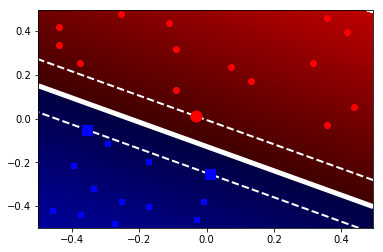

In [2]:
import svmtrain, drawBoundary, importlib
importlib.reload(svmtrain)

model = svmtrain.SVMWrapper(['-t', '0', '-c', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

This invocation of svm-train says:

    -t 0    -- use a linear kernel
    -c 100  -- set "C" = 100, which means "overfit a lot"

This is an easily separable dataset, which is reflected by the small
number of support vectors. In the plot, the SVs are drawn big (and are
on the margin, the dashed line one unit away from the decision
boundary, the solid line).

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU1 (10%):

You should have found that it takes 3 support
vectors. Could you have fewer (eg., 2) support vectors here?

**WU1 Answer - For this dataset it is not possible to have fewer than 3 support vectors. This is being concluded after changing values of c to 1, 10 and 1000 for which the fewest support vectors remained to be 3. Though it should be noted that for any other (linearly separable) dataset it can be possible to have 2 support vectors, one on either side of the Margin.***

Although it's unnecessary, we can also train a polynomial SVM with
degree 10 (for instance), with:

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['poly'], 'gamma': ['1.0'], 'degree': ['10.0'], 'coef0': ['1.0'], 'nr_class': ['2'], 'total_sv': ['4'], 'rho': ['1.0022942741858363'], 'label': ['-1', '1'], 'nr_sv': ['2', '2']}
[ 1.99871327  0.99432572 -2.86996698 -0.12307201]
[[ 0.01020408 -0.25510204]
 [-0.35714286 -0.05102041]
 [-0.03061224  0.01020408]
 [-0.37755102  0.25510204]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=10.0, gamma=1.0, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


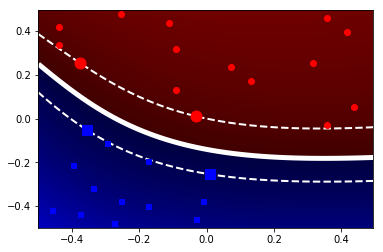

In [3]:
model = svmtrain.SVMWrapper(['-t', '1', '-r', '1', '-d', 10, '-c', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

This says:

    -t 1      -- use a polynomial kernel
    -r 1      -- use (1 + u*v)^degree, where "r" is the "1"
    -d 10     -- tenth degree

You'll see that you get a curved decision boundary, though of course
this is somewhat overkill.

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['1.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['4'], 'rho': ['-0.5821953218575648'], 'label': ['-1', '1'], 'nr_sv': ['2', '2']}
[ 11.80307156  10.79578114 -20.3763535   -2.2224992 ]
[[ 0.01020408 -0.25510204]
 [-0.35714286 -0.05102041]
 [-0.03061224  0.01020408]
 [-0.37755102  0.25510204]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


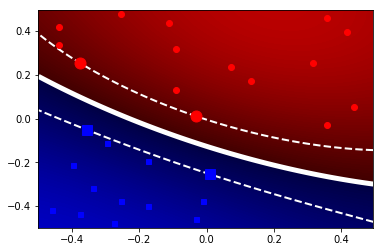

In [4]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

(Here, `-t 2` means RBF and `-g 1` means gamma=1)

Again, this is overkill. But we can try to understand RBF kernels a
bit better by "turning up" the gamma:

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['100.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['28'], 'rho': ['0.16680290024000682'], 'label': ['-1', '1'], 'nr_sv': ['13', '15']}
[ 0.82285155  0.84752243  0.28594756  0.94169804  0.77022762  0.18419132
  0.47536808  0.67229685  1.02615978  0.86704195  1.04815592  0.52140238
  0.8643894  -0.6598347  -0.72704879 -0.65666199 -0.68312134 -0.56444841
 -0.52222811 -0.71579707 -0.78802644 -0.65636273 -0.23878393 -0.52615593
 -0.6586009  -0.61031031 -0.57434495 -0.74552726]
[[-0.2755102  -0.47959184]
 [-0.03061224 -0.45918367]
 [-0.37755102 -0.43877551]
 [-0.45918367 -0.41836735]
 [-0.17346939 -0.39795918]
 [-0.25510204 -0.37755102]
 [-0.01020408 -0.37755102]
 [-0.33673469 -0.31632653]
 [ 0.01020408 -0.25510204]
 [-0.39795918 -0.21428571]
 [-0.17346939 -0.19387755]
 [-0.29591837 -0.1122449 ]
 [-0.35714286 -0.05102041]
 [ 0.35714286 -0.03061224]
 [-0.03061224  0.01020408

fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


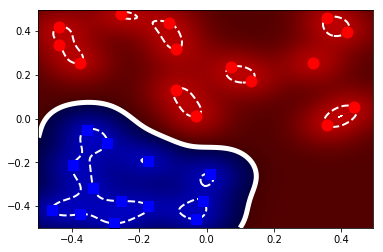

In [5]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, '-g', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

A gamma of 100 means that you have to be *really* close to a point to
have a kernel value that's non-zero.

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU2 (10%):
Why do you get these little blobs? How high do you have
   to turn gamma up in order to get a little decision boundary around
   each example?

**WU2 Answer - Gamma defines how far the influence of a single training example reaches. More technically, gamma is used as a similarity measure between two points. A small gamma value implies that two points can be considered similar even if they are far from each other while a large gamma value implies that two points are considered similar when they are close to each other. Here when it is 100, the value is high enough to wrap points that are colser-by but not high enough to separate/isolate every single point. In order to isolate each point i.e. to get decision boudary around each example, gamma had to be turned up to around 2000**

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['2000.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['28'], 'rho': ['0.07142860883672321'], 'label': ['-1', '1'], 'nr_sv': ['13', '15']}
[ 1.0712891   1.07128834  1.07128834  1.07128836  1.07128834  1.07128834
  1.07226487  1.0712891   1.07128911  1.07128911  1.07128911  1.07128877
  1.0722653  -0.92871089 -0.9287109  -0.9287109  -0.9287109  -0.92871061
 -0.92871061 -0.92871089 -0.9287109  -0.92871089 -0.92773286 -0.92871061
 -0.92773286 -0.92871089 -0.92871061 -0.9287109 ]
[[-0.2755102  -0.47959184]
 [-0.03061224 -0.45918367]
 [-0.37755102 -0.43877551]
 [-0.45918367 -0.41836735]
 [-0.17346939 -0.39795918]
 [-0.25510204 -0.37755102]
 [-0.01020408 -0.37755102]
 [-0.33673469 -0.31632653]
 [ 0.01020408 -0.25510204]
 [-0.39795918 -0.21428571]
 [-0.17346939 -0.19387755]
 [-0.29591837 -0.1122449 ]
 [-0.35714286 -0.05102041]
 [ 0.35714286 -0.03061224]
 [-0.03061224  0.0102040

fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2000.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
C:\Users\Pratyush\Anaconda3\envs\cs412\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


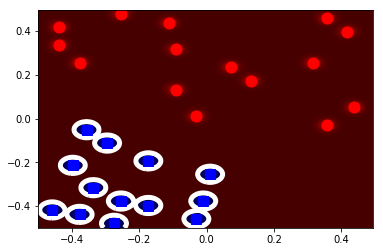

In [9]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, '-g', 2000, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

Let's now switch to a more complex dataset. We'll begin by failing
with a linear model:

training model data1 -> data1.model
{'svm_type': ['c_svc'], 'kernel_type': ['linear'], 'gamma': ['1.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['30'], 'rho': ['-0.14278038193824918'], 'label': ['-1', '1'], 'nr_sv': ['15', '15']}
[ 100.          100.          100.          100.          100.
  100.          100.          100.          100.          100.
  100.           97.01675579  100.          100.           16.54808684
  -13.56484262 -100.         -100.         -100.         -100.
 -100.         -100.         -100.         -100.         -100.
 -100.         -100.         -100.         -100.         -100.        ]
[[-0.37755102 -0.47959184]
 [-0.45918367 -0.41836735]
 [-0.45918367 -0.33673469]
 [-0.37755102 -0.2755102 ]
 [ 0.39795918 -0.23469388]
 [-0.31632653 -0.21428571]
 [ 0.45918367 -0.13265306]
 [-0.29591837 -0.09183673]
 [ 0.33673469 -0.03061224]
 [ 0.31632653  0.09183673]
 [ 0.21428571  0.19387755]
 [-0.05102041  0.25510204]
 [ 0.39795918  0.2959183

fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


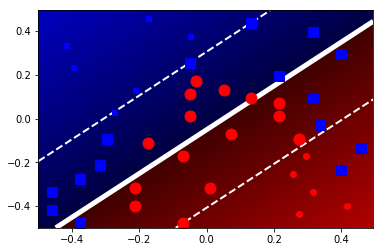

In [15]:
model = svmtrain.SVMWrapper(['-t', '0', '-c', 100, 'data1', 'data1.model'])
model.train()
c = drawBoundary.Boundary('data1')
c.draw()

As you can see, this data fails horribly.

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU3 (10%): 
There are a lot of red support vectors on the blue side
   of the decision boundary. Why?

**WU3 Answer - It is because the dataset is not lineraly separable and on using linear kernel, misclassifications of these datapoints takes place. These misclassified datapoints therefore gets represented as support vectors.**

However, now we can get some mileage out of polynomial kernels:

training model data1 -> data1.model
{'svm_type': ['c_svc'], 'kernel_type': ['poly'], 'gamma': ['1.0'], 'degree': ['3.0'], 'coef0': ['1.0'], 'nr_class': ['2'], 'total_sv': ['12'], 'rho': ['2.2211163504019455'], 'label': ['-1', '1'], 'nr_sv': ['6', '6']}
[ 100.           25.53617224  100.           13.25821994   51.52745021
  100.          -62.0994248    -9.32618275 -100.         -100.
  -18.89623484 -100.        ]
[[ 0.39795918 -0.23469388]
 [-0.31632653 -0.21428571]
 [ 0.33673469 -0.03061224]
 [-0.21428571  0.13265306]
 [ 0.21428571  0.19387755]
 [-0.05102041  0.25510204]
 [ 0.41836735 -0.39795918]
 [ 0.2755102  -0.09183673]
 [ 0.21428571  0.01020408]
 [ 0.21428571  0.07142857]
 [ 0.05102041  0.13265306]
 [-0.03061224  0.17346939]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3.0, gamma=1.0, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


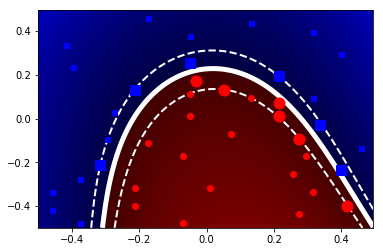

In [16]:
model = svmtrain.SVMWrapper(['-t', '1', '-r', '1', '-d', 3, '-c', 100, 'data1', 'data1.model'])
model.train()
c = drawBoundary.Boundary('data1')
c.draw()

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU4 (10%):
Based on this data, is the 0/1 loss on the training
   data zero? Is the hinge loss on the training data zero?

In [100]:
from sklearn.metrics import hinge_loss, zero_one_loss
from sklearn.svm import SVC

model = svmtrain.SVMWrapper(['-t', '1', '-r', '1', '-d', 3, '-c', 100, '-g', 1, 'data1', 'data1.model'])
X, Y = model.loadData()
model = SVC(C=100, kernel='poly', degree=3, gamma=1, coef0=1)
model.fit(X, Y)
yPred = model.predict(X)
zero_one_loss = zero_one_loss(Y, yPred)
print("0/1 Loss =", zero_one_loss)

pred_decision = model.decision_function(X)
hinge_loss = hinge_loss(Y, pred_decision)
print("Hinge Loss =", hinge_loss)

training model data1 -> data1.model
0/1 Loss = 0.0
Hinge Loss = 0.06444838025160154


**WU4 Answer - On the above dataset, 0/1 Loss is zero while Hinge loss is not zero**

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU5 (10%):
Train an RBF kernel on this data. What's the smallest
   gamma for which you can get a good decision boundary (one that minimizes the loss)?

training model data1 -> data1.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['2.5'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['9'], 'rho': ['-4.532307963217627'], 'label': ['-1', '1'], 'nr_sv': ['5', '4']}
[  97.32977269   14.65827213    3.17670469   64.86027009   41.97915797
   -2.23159451  -65.81063562 -100.          -53.96194746]
[[ 0.39795918 -0.23469388]
 [-0.29591837 -0.09183673]
 [-0.21428571  0.13265306]
 [ 0.21428571  0.19387755]
 [-0.05102041  0.25510204]
 [-0.21428571 -0.39795918]
 [ 0.41836735 -0.39795918]
 [ 0.21428571  0.07142857]
 [-0.03061224  0.17346939]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


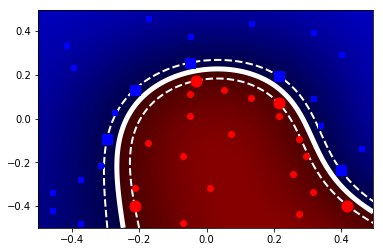

0/1 Loss = 0.0
Hinge Loss = 0.000643515936161434


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss, zero_one_loss
import svmtrain, drawBoundary, importlib
importlib.reload(svmtrain)

g = 2.5
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, '-g', g, 'data1', 'data1.model'])
model.train()
c = drawBoundary.Boundary('data1')
c.draw()

Xtr, Ytr = model.loadData()
model = SVC(C=100, kernel='rbf', gamma=g)
model.fit(Xtr, Ytr)
Ypr = model.predict(Xtr)
zero_one_loss = zero_one_loss(Ytr, Ypr)
print("0/1 Loss =", zero_one_loss)
pred_decision = model.decision_function(Xtr)
hinge_loss = hinge_loss(Ytr, pred_decision)
print("Hinge Loss =", hinge_loss)

**WU5 Answer - For gamma as low as 1.1, 0/1 Loss = 0 but best value of Hinge loss (= 0.000643515936161434) along with 0/1 loss = 0 was obtained when gamma was equal to 2.5. Also, from the plot above when gamma=2.5 we observe that none of the datapoints are misclassified and all the support vectors are also almost beyond their respective margins. So, 2.5 seems to be a good gamma value. However, if only number of misclassifications are of concern then gamma=1.1 is sufficient enough to classify datapoints with zero misclassifications.**

# Part 2: K-means [20% implementation, 30% written part]

Your second task is to implement the largest distance heuristic for
kmeans clustering in `clustering.py`.

We'll now quickly run through some basic experiments k-means:

Iteration 0, objective=1.914842509553385


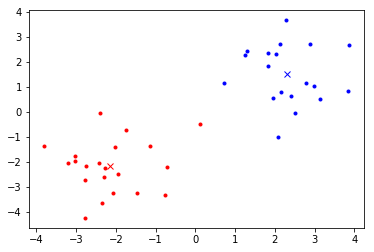

Iteration 1, objective=1.914842509553385


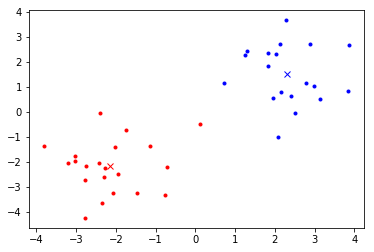

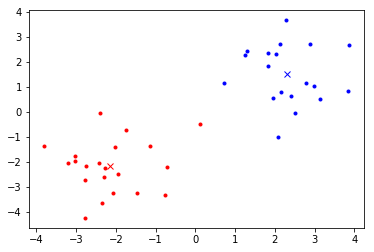

[[ 2.31287961  1.51333813]
 [-2.13455999 -2.15661017]]
[0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 1]
[1.91484251 1.91484251]


In [8]:
import clustering, datasets

mu0 = clustering.initialize_clusters(datasets.X2d, 2, 'determ')
(mu,z,obj) = clustering.kmeans(datasets.X2d, mu0)
print(mu)
#array([[ 2.31287961,  1.51333813],
#       [-2.13455999, -2.15661017]])
print(z)
#array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
#       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])
print(obj)
#array([ 1.91484251,  1.91484251])

**Hint:** While running, this will plot the results.  If you want
to turn that off, comment out the obvious line in the `kmeans`
function.  

You can also play with another example:

Iteration 0, objective=5.845742328111946


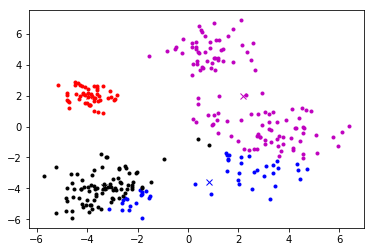

Iteration 1, objective=4.379704448165534


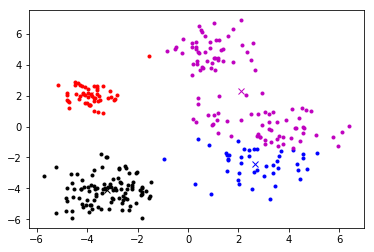

Iteration 2, objective=3.0693781383567345


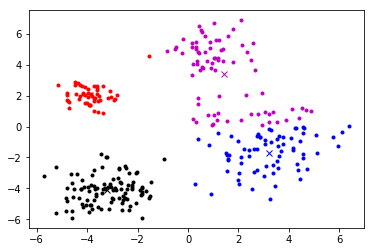

Iteration 3, objective=2.452183737921355


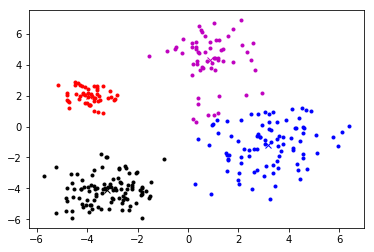

Iteration 4, objective=2.3479513734792916


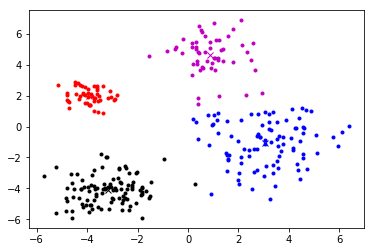

Iteration 5, objective=2.3479513734792916


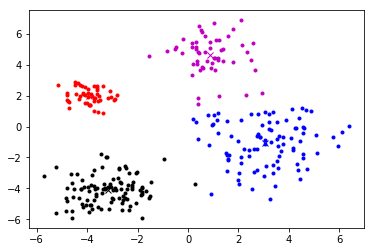

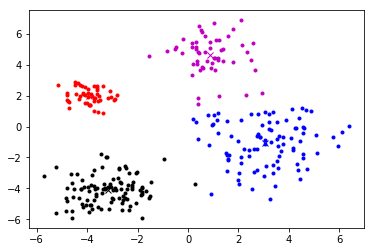

[[ 3.06150611 -1.07977065]
 [-3.92433223  1.99052827]
 [ 0.87252863  4.63384851]
 [-3.17087245 -4.10528255]]
[3 1 2 3 0 1 1 2 2 0 3 0 0 0 2 3 3 3 0 0 1 0 0 0 2 2 0 0 0 1 0 3 3 2 2 2 1
 1 3 0 3 0 0 3 1 3 3 2 1 0 1 1 3 2 3 3 0 0 3 2 0 3 1 3 0 3 2 3 3 3 3 3 0 1
 0 3 0 0 1 2 3 2 2 3 3 1 2 0 0 2 3 0 1 3 0 2 3 3 3 3 2 2 3 1 0 3 0 0 0 0 0
 1 1 2 0 1 0 2 3 1 3 0 1 1 3 0 0 1 0 3 3 1 0 0 3 0 2 2 1 0 2 3 3 3 0 3 2 3
 1 1 0 2 1 3 3 0 2 0 2 0 1 2 3 1 0 3 0 3 3 2 2 0 0 0 0 0 2 0 3 0 0 2 3 0 0
 0 2 3 2 0 2 0 0 3 0 2 0 1 2 3 3 0 3 3 2 3 1 0 0 0 0 3 0 0 1 0 3 0 1 2 3 2
 3 3 1 3 3 3 1 3 0 3 2 0 2 3 2 3 3 1 3 3 3 3 2 3 0 2 2 0 0 2 1 2 3 1 3 1 3
 1 3 0 1 3 3 0 3 0 1 3 3 1 2 3 0 2 3 0 0 3 3 1 2 3 0 3 3 1 1 1 2 0 3 0 3 1
 0 3 3 0]
[5.84574233 4.37970445 3.06937814 2.45218374 2.34795137 2.34795137]


In [9]:
mu0 = clustering.initialize_clusters(datasets.X2d2, 4, 'determ')
(mu,z,obj) = clustering.kmeans(datasets.X2d2, mu0)
#Iteration 0, objective=5.84574
#Iteration 1, objective=4.3797
#Iteration 2, objective=3.06938
#Iteration 3, objective=2.45218
#Iteration 4, objective=2.34795
#Iteration 5, objective=2.34795
print(mu)
#array([[ 3.06150611, -1.07977065],
#       [-3.92433223,  1.99052827],
#       [ 0.87252863,  4.63384851],
#       [-3.17087245, -4.10528255]])
print(z)
# a large array
print(obj)
# array([ 5.84574233,  4.37970445,  3.06937814,  2.45218374,  2.34795137,
#        2.34795137])

Once you've implemented the furthest first heuristic, you can do a test by:

Iteration 0, objective=0.4904959298491274
Iteration 1, objective=0.46690510180747524
Iteration 2, objective=0.45516871296591854
Iteration 3, objective=0.4501227484959349
Iteration 4, objective=0.448190407141169
Iteration 5, objective=0.4470378433157158
Iteration 6, objective=0.4457139970915318
Iteration 7, objective=0.44463777838892654
Iteration 8, objective=0.44419935725397997
Iteration 9, objective=0.44387781533776927
Iteration 10, objective=0.4435091955357767
Iteration 11, objective=0.44328895314636474
Iteration 12, objective=0.4429329175156199
Iteration 13, objective=0.4422819475096885
Iteration 14, objective=0.44218260095884543
Iteration 15, objective=0.4420447771722627
Iteration 16, objective=0.44192562884294595
Iteration 17, objective=0.4418326791432048
Iteration 18, objective=0.4417627054404309
Iteration 19, objective=0.44167289608356236
Iteration 20, objective=0.4415938473965986
Iteration 21, objective=0.4415165123900784
Iteration 22, objective=0.44148013575892575
Iteration 23

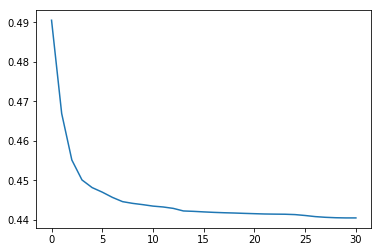

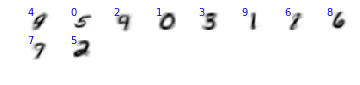

In [10]:
import util
importlib.reload(clustering)
from pylab import *

(X,Y) = datasets.loadDigits()
mu0 = clustering.initialize_clusters(X, 10, 'random')
(mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
plot(obj)
show(block=False)
util.drawDigits(mu, arange(10))

This may take a few seconds to run. 

Note: it's very hard to provide test cases for this because of
randomness and python (unfortunately) doesn't guarantee cross-platform
randomness to be the same. Here's one thing we can do; hopefully it's
somewhat useful.

In [8]:
importlib.reload(clustering)
import numpy as np

finalObj = []
for rep in range(10):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 10, 'ffh')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
#(lots of output)

np.mean(finalObj)
#0.44031610993896342

Iteration 0, objective=0.4942493292050429
Iteration 1, objective=0.4699137216910071
Iteration 2, objective=0.4575060197151588
Iteration 3, objective=0.4525797376542057
Iteration 4, objective=0.44988762561304646
Iteration 5, objective=0.4458164343489
Iteration 6, objective=0.443052347500943
Iteration 7, objective=0.44139090665288827
Iteration 8, objective=0.44030383350398355
Iteration 9, objective=0.4396732220385582
Iteration 10, objective=0.43937766285104723
Iteration 11, objective=0.4392437221906902
Iteration 12, objective=0.43915462147867923
Iteration 13, objective=0.43908538136608216
Iteration 14, objective=0.4390651611804345
Iteration 15, objective=0.4390400931574512
Iteration 16, objective=0.4390400931574512
Iteration 0, objective=0.4900394457854972
Iteration 1, objective=0.4611540334844038
Iteration 2, objective=0.4538969108866529
Iteration 3, objective=0.4507819205878977
Iteration 4, objective=0.44893983691587225
Iteration 5, objective=0.44760236144535087
Iteration 6, objective=

Iteration 22, objective=0.4399389952670224
Iteration 23, objective=0.43977905204370027
Iteration 24, objective=0.4397055394399721
Iteration 25, objective=0.4396538351782843
Iteration 26, objective=0.4395567107942285
Iteration 27, objective=0.43946441578453294
Iteration 28, objective=0.43944524189279577
Iteration 29, objective=0.43942897100575357
Iteration 30, objective=0.43942897100575357
Iteration 0, objective=0.5004136400320425
Iteration 1, objective=0.4764402219396814
Iteration 2, objective=0.46781272179888794
Iteration 3, objective=0.46476594385740333
Iteration 4, objective=0.4615748037210225
Iteration 5, objective=0.45650109745022477
Iteration 6, objective=0.4507962660331953
Iteration 7, objective=0.4442241434162234
Iteration 8, objective=0.4408737781078887
Iteration 9, objective=0.4389531161443329
Iteration 10, objective=0.43733563625862926
Iteration 11, objective=0.4360077129756247
Iteration 12, objective=0.43523381389154575
Iteration 13, objective=0.4347191581436162
Iteration 1

0.44031610993896353

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU6  (10%)
Run kmeans with ffh. How many iterations does it seem to
take for kmeans to converge using ffh?  Do the resulting cluster means
look like digits for most of these runs?  Pick the "best" run (i.e.,
the one with the lowest final objective) and plot the digits (include
the plot in the writeup).  How many of the digits 0-9 are represented?
Which ones are missing?  Try both with ffh and with random
initialization: how many iterations does it take for kmeans to
converge (on average) for each setting?

In [31]:
import clustering, datasets
import importlib
importlib.reload(clustering)
import numpy as np
from pylab import *
import util

def foo(arg, runs, k):
    finalObj = []
    iterList = []
    muList = []
    for rep in range(runs):
        np.random.seed(1234 + rep)
        mu0 = clustering.initialize_clusters(X, k, arg)
        (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
        finalObj.append(obj[-1])
        iterList.append(len(obj))
        muList.append(mu)
        util.drawDigits(mu, arange(k))
    show(block=False)
    print("\nMean =",np.mean(finalObj))
    avg_iterations = sum(iterList) / float(len(iterList))
    print("Average number of iterations =",avg_iterations)
    minObjIndex = np.argmin(finalObj)
    print("Lowest final objective =",finalObj[minObjIndex])
    show(block=False)
    util.drawDigits(muList[minObjIndex], arange(k))
    print("Digits corresponding to the best run")

Running for 'ffh'
Iteration 0, objective=0.4942493292050429
Iteration 1, objective=0.4699137216910071
Iteration 2, objective=0.4575060197151588
Iteration 3, objective=0.4525797376542057
Iteration 4, objective=0.44988762561304646
Iteration 5, objective=0.4458164343489
Iteration 6, objective=0.443052347500943
Iteration 7, objective=0.44139090665288827
Iteration 8, objective=0.44030383350398355
Iteration 9, objective=0.4396732220385582
Iteration 10, objective=0.43937766285104723
Iteration 11, objective=0.4392437221906902
Iteration 12, objective=0.43915462147867923
Iteration 13, objective=0.43908538136608216
Iteration 14, objective=0.4390651611804345
Iteration 15, objective=0.4390400931574512
Iteration 16, objective=0.4390400931574512
Iteration 0, objective=0.4900394457854972
Iteration 1, objective=0.4611540334844038
Iteration 2, objective=0.4538969108866529
Iteration 3, objective=0.4507819205878977
Iteration 4, objective=0.44893983691587225
Iteration 5, objective=0.44760236144535087
Itera

Iteration 22, objective=0.4399389952670224
Iteration 23, objective=0.43977905204370027
Iteration 24, objective=0.4397055394399721
Iteration 25, objective=0.4396538351782843
Iteration 26, objective=0.4395567107942285
Iteration 27, objective=0.43946441578453294
Iteration 28, objective=0.43944524189279577
Iteration 29, objective=0.43942897100575357
Iteration 30, objective=0.43942897100575357
Iteration 0, objective=0.5004136400320425
Iteration 1, objective=0.4764402219396814
Iteration 2, objective=0.46781272179888794
Iteration 3, objective=0.46476594385740333
Iteration 4, objective=0.4615748037210225
Iteration 5, objective=0.45650109745022477
Iteration 6, objective=0.4507962660331953
Iteration 7, objective=0.4442241434162234
Iteration 8, objective=0.4408737781078887
Iteration 9, objective=0.4389531161443329
Iteration 10, objective=0.43733563625862926
Iteration 11, objective=0.4360077129756247
Iteration 12, objective=0.43523381389154575
Iteration 13, objective=0.4347191581436162
Iteration 1

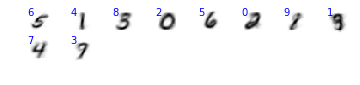

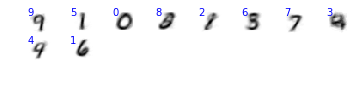

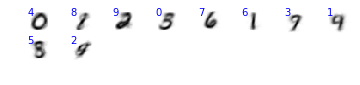

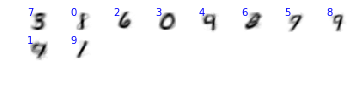

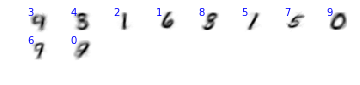

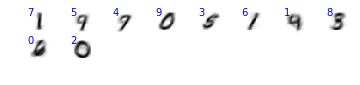

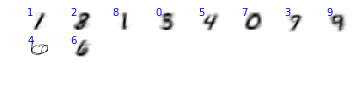

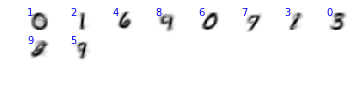

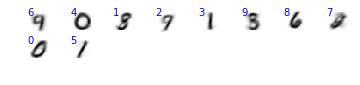

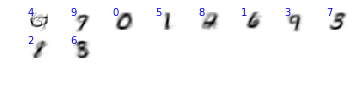


Mean = 0.44031610993896353
Average number of iterations = 24.7
Lowest final objective = 0.4341485744888688
Digits corresponding to the best run


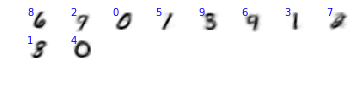

In [26]:
print("Running for 'ffh'")
foo('ffh',10,10)

Running for 'random'
Iteration 0, objective=0.48381226068860866
Iteration 1, objective=0.4591520680775249
Iteration 2, objective=0.45239842084049187
Iteration 3, objective=0.44822068206596277
Iteration 4, objective=0.44587306821642514
Iteration 5, objective=0.44484132601758786
Iteration 6, objective=0.4440270507092174
Iteration 7, objective=0.44376675161176027
Iteration 8, objective=0.44365859624351583
Iteration 9, objective=0.4434695729076083
Iteration 10, objective=0.44341572883780755
Iteration 11, objective=0.4433774116546288
Iteration 12, objective=0.44334796661317466
Iteration 13, objective=0.44328564998481546
Iteration 14, objective=0.4432157881258871
Iteration 15, objective=0.44308030731485154
Iteration 16, objective=0.4430424687165351
Iteration 17, objective=0.4430256681630123
Iteration 18, objective=0.44300870861884023
Iteration 19, objective=0.44300870861884023
Iteration 0, objective=0.5093288297414574
Iteration 1, objective=0.47418849388257023
Iteration 2, objective=0.463491

Iteration 4, objective=0.43915418786558447
Iteration 5, objective=0.4385149276303788
Iteration 6, objective=0.4381872383123833
Iteration 7, objective=0.43791896484009746
Iteration 8, objective=0.4375883405210408
Iteration 9, objective=0.4371091940320848
Iteration 10, objective=0.4367874843012457
Iteration 11, objective=0.4365856793308767
Iteration 12, objective=0.4364447491425895
Iteration 13, objective=0.43633441928125594
Iteration 14, objective=0.4362300195248259
Iteration 15, objective=0.4361385055969757
Iteration 16, objective=0.43609715851071734
Iteration 17, objective=0.43607072335020053
Iteration 18, objective=0.43603137714440976
Iteration 19, objective=0.43601935034462075
Iteration 20, objective=0.43600226760652255
Iteration 21, objective=0.43600226760652255
Iteration 0, objective=0.48440761367087065
Iteration 1, objective=0.4622969251144895
Iteration 2, objective=0.4565629286333419
Iteration 3, objective=0.45247224262268104
Iteration 4, objective=0.4495592307369048
Iteration 5

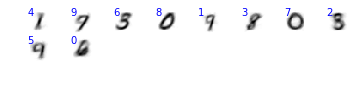

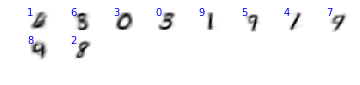

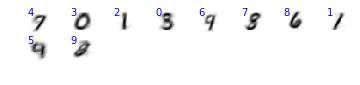

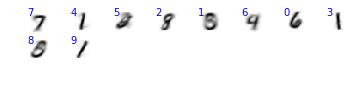

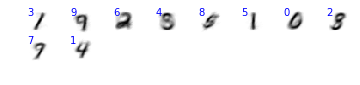

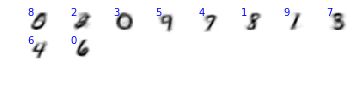

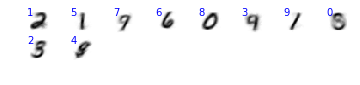

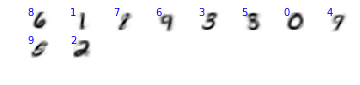

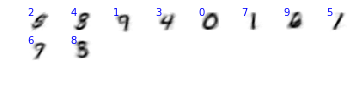

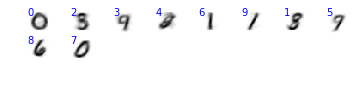


Mean = 0.43812563793218773
Average number of iterations = 25.0
Lowest final objective = 0.43411661638259985
Digits corresponding to the best run


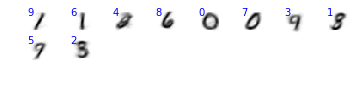

In [27]:
print("Running for 'random'")
foo('random',10,10)

**WU6 Answer**

- Using 'ffh', it takes around 25 iterations (avg = 24.7) for k-means to converge.
- For most of the runs using 'ffh', the resulting cluster means does look like digits.
- The digits plot for the best run can be found in above cells along with Lowest final objective values.
- Using 'ffh', digits 0, 1, 6 & 9 are clearly represented, digits 2, 3 & 8 are represented but not clearly and digits 4, 5 & 7 are missing.
- Using 'ffh' average iterations is 24.7 while using 'random' it is 25

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU7 (10%)
Repeat WU6, but for k=25.  Pick the best of 5 runs, and
plot the digits.  Are you able to see all digits here?

Running for 'random'
Iteration 0, objective=0.3957193068311177
Iteration 1, objective=0.3732388314706707
Iteration 2, objective=0.3675874305949783
Iteration 3, objective=0.3661092513264912
Iteration 4, objective=0.3651159978202249
Iteration 5, objective=0.3647927200296262
Iteration 6, objective=0.3646533512264018
Iteration 7, objective=0.3645040496128243
Iteration 8, objective=0.3644812104884102
Iteration 9, objective=0.3644223833360167
Iteration 10, objective=0.3644223833360167
Iteration 0, objective=0.4331395797120999
Iteration 1, objective=0.39434834050126705
Iteration 2, objective=0.3779601413062955
Iteration 3, objective=0.372073914130097
Iteration 4, objective=0.36992472217709227
Iteration 5, objective=0.36817758915490795
Iteration 6, objective=0.36734520829385053
Iteration 7, objective=0.3666832968759819
Iteration 8, objective=0.3664498689798847
Iteration 9, objective=0.3662862990784454
Iteration 10, objective=0.3661127804735037
Iteration 11, objective=0.3660520756671734
Iterati

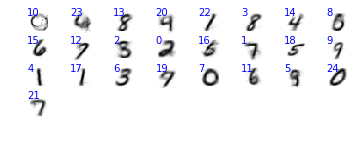

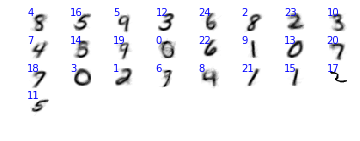

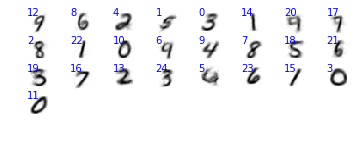

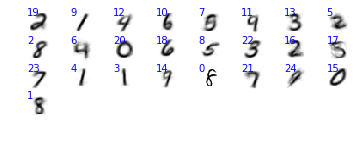

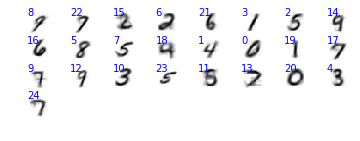


Mean = 0.3646369250485496
Average number of iterations = 18.2
Lowest final objective = 0.3631978295420804
Digits corresponding to the best run


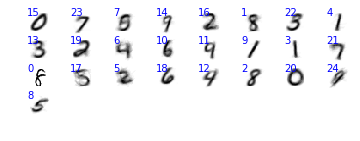

In [33]:
print("Running for 'random'")
foo('random',5,25)

Running for 'random'
Iteration 0, objective=0.3957193068311177
Iteration 1, objective=0.3732388314706707
Iteration 2, objective=0.3675874305949783
Iteration 3, objective=0.3661092513264912
Iteration 4, objective=0.3651159978202249
Iteration 5, objective=0.3647927200296262
Iteration 6, objective=0.3646533512264018
Iteration 7, objective=0.3645040496128243
Iteration 8, objective=0.3644812104884102
Iteration 9, objective=0.3644223833360167
Iteration 10, objective=0.3644223833360167
Iteration 0, objective=0.4331395797120999
Iteration 1, objective=0.39434834050126705
Iteration 2, objective=0.3779601413062955
Iteration 3, objective=0.372073914130097
Iteration 4, objective=0.36992472217709227
Iteration 5, objective=0.36817758915490795
Iteration 6, objective=0.36734520829385053
Iteration 7, objective=0.3666832968759819
Iteration 8, objective=0.3664498689798847
Iteration 9, objective=0.3662862990784454
Iteration 10, objective=0.3661127804735037
Iteration 11, objective=0.3660520756671734
Iterati

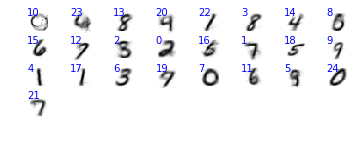

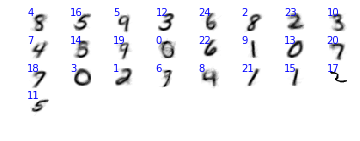

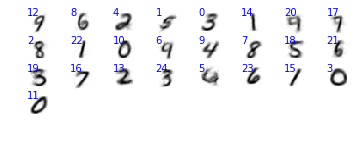

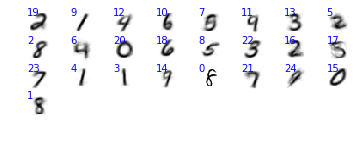

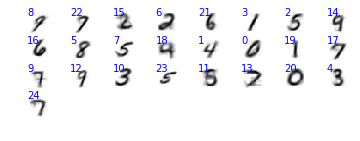


Mean = 0.3646369250485496
Average number of iterations = 18.2
Lowest final objective = 0.3631978295420804
Digits corresponding to the best run


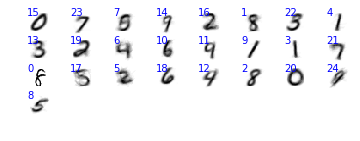

In [34]:
print("Running for 'random'")
foo('random',5,25)

**WU7 Answer - Yes, all the digits are visible for both 'ffh' and 'random'**

Finally, implement the kmeans++ heuristic. Here is some output:

In [43]:
importlib.reload(clustering)

finalObj = []
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 10, 'km++')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
#(lots of output)

np.mean(finalObj)
#0.4392510535744174

Iteration 0, objective=0.5084319081224996
Iteration 1, objective=0.47137365794110236
Iteration 2, objective=0.45150476433352693
Iteration 3, objective=0.4458039021803831
Iteration 4, objective=0.44313519412982827
Iteration 5, objective=0.4414278831649406
Iteration 6, objective=0.43984311683554955
Iteration 7, objective=0.43886879589595934
Iteration 8, objective=0.4384032043429793
Iteration 9, objective=0.43827108222946204
Iteration 10, objective=0.4381757495447626
Iteration 11, objective=0.4381116603153458
Iteration 12, objective=0.4381031691689359
Iteration 13, objective=0.4381031691689359
Iteration 0, objective=0.4822500503432397
Iteration 1, objective=0.45861653057949286
Iteration 2, objective=0.4503026894774321
Iteration 3, objective=0.442458123137842
Iteration 4, objective=0.4383213008504935
Iteration 5, objective=0.4371581962732966
Iteration 6, objective=0.43690775910897606
Iteration 7, objective=0.43676381712656087
Iteration 8, objective=0.4366360222576228
Iteration 9, objective

Iteration 12, objective=0.43913048823286277
Iteration 13, objective=0.43892347122680586
Iteration 14, objective=0.4388327882016947
Iteration 15, objective=0.4388182412611403
Iteration 16, objective=0.4388182412611403
Iteration 0, objective=0.47824902855641555
Iteration 1, objective=0.45966346932146473
Iteration 2, objective=0.4539127846151989
Iteration 3, objective=0.45069375460393296
Iteration 4, objective=0.44850509309747333
Iteration 5, objective=0.4460211274916
Iteration 6, objective=0.4438839369872177
Iteration 7, objective=0.4428200448091189
Iteration 8, objective=0.4422985874697097
Iteration 9, objective=0.44191627996249533
Iteration 10, objective=0.4416170785951348
Iteration 11, objective=0.44135860679514294
Iteration 12, objective=0.4408945198378795
Iteration 13, objective=0.44016736809907736
Iteration 14, objective=0.43910486041054697
Iteration 15, objective=0.43825571160136284
Iteration 16, objective=0.43741138779950695
Iteration 17, objective=0.43717787932132723
Iteration 1

Iteration 0, objective=0.49644495330089716
Iteration 1, objective=0.46730654397251326
Iteration 2, objective=0.4589247796109388
Iteration 3, objective=0.45355971810584955
Iteration 4, objective=0.45110082251046735
Iteration 5, objective=0.44967256136676964
Iteration 6, objective=0.4492906797482664
Iteration 7, objective=0.4491762451114475
Iteration 8, objective=0.4491020320172348
Iteration 9, objective=0.4490628508187943
Iteration 10, objective=0.4490289430113383
Iteration 11, objective=0.44896244217076203
Iteration 12, objective=0.4487890239987711
Iteration 13, objective=0.4486407648983385
Iteration 14, objective=0.4482402849266337
Iteration 15, objective=0.4478932818374264
Iteration 16, objective=0.44735578579799434
Iteration 17, objective=0.4465811396092535
Iteration 18, objective=0.445649664145659
Iteration 19, objective=0.44459134193837274
Iteration 20, objective=0.443830597241749
Iteration 21, objective=0.4435068450728538
Iteration 22, objective=0.4433009345203808
Iteration 23, o

0.4396416608851488

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU8 (10%)
Compare vanilla kmeans (with random initialization) to ffh to km++ for (a) 
    a small number of clusters (say, 2 or 3) and (b) a large number of clusters (say 25). 
    Do you see a big difference in performance at either end?

In [45]:
import clustering, datasets
import importlib
importlib.reload(clustering)
import numpy as np
from pylab import *
import util

def foo_new(arg, k):
    finalObj = []
    iterList = []
    for rep in range(20):
        np.random.seed(1234 + rep)
        mu0 = clustering.initialize_clusters(X, k, arg)
        (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
        finalObj.append(obj[-1])
        iterList.append(len(obj))
    print("\nMean =",np.mean(finalObj))
    avg_iterations = sum(iterList) / float(len(iterList))
    print("Average number of iterations =",avg_iterations)
    minObjIndex = np.argmin(finalObj)
    print("Lowest final objective =",finalObj[minObjIndex])
    show(block=False)
    util.drawDigits(mu, arange(k))

**Comparing 'random', 'ffh' and 'km++' for small number of clusters (k=3)**

Running for 'random'
Iteration 0, objective=0.5562533603557837
Iteration 1, objective=0.5471516766859488
Iteration 2, objective=0.5453014311580648
Iteration 3, objective=0.5441186229734197
Iteration 4, objective=0.5422510056294241
Iteration 5, objective=0.541121801235668
Iteration 6, objective=0.5404816132573843
Iteration 7, objective=0.5400042563970967
Iteration 8, objective=0.5396704843751756
Iteration 9, objective=0.539361494100962
Iteration 10, objective=0.5391820298408952
Iteration 11, objective=0.5390340624324534
Iteration 12, objective=0.5388757893296573
Iteration 13, objective=0.5388239850819566
Iteration 14, objective=0.5387855835338864
Iteration 15, objective=0.5387501294670173
Iteration 16, objective=0.5387000778708738
Iteration 17, objective=0.5386613371967709
Iteration 18, objective=0.5386305998424559
Iteration 19, objective=0.5386040771219749
Iteration 20, objective=0.5385420699866758
Iteration 21, objective=0.5384981307469291
Iteration 22, objective=0.5384247509638044
It

Iteration 8, objective=0.5373647017088667
Iteration 9, objective=0.5372681004553393
Iteration 10, objective=0.5371223990075119
Iteration 11, objective=0.5369225866927876
Iteration 12, objective=0.536604425255884
Iteration 13, objective=0.536324149993814
Iteration 14, objective=0.5360988054721675
Iteration 15, objective=0.5358604062477632
Iteration 16, objective=0.535724155937465
Iteration 17, objective=0.535686743967923
Iteration 18, objective=0.5356726956757436
Iteration 19, objective=0.5356677311897835
Iteration 20, objective=0.5356677311897835
Iteration 0, objective=0.5531926275777544
Iteration 1, objective=0.5451563571323487
Iteration 2, objective=0.5422206330553444
Iteration 3, objective=0.5404113777199256
Iteration 4, objective=0.5397435486332868
Iteration 5, objective=0.5394271237928794
Iteration 6, objective=0.5390564707793585
Iteration 7, objective=0.5386295325825955
Iteration 8, objective=0.5383172332280036
Iteration 9, objective=0.5379625883246705
Iteration 10, objective=0.5

Iteration 19, objective=0.5328010991876583
Iteration 20, objective=0.5326715210017704
Iteration 21, objective=0.5326064146046455
Iteration 22, objective=0.5325660931704852
Iteration 23, objective=0.5325558346256091
Iteration 24, objective=0.5325509465735896
Iteration 25, objective=0.5325466538408633
Iteration 26, objective=0.5325466538408633
Iteration 0, objective=0.5442195169281323
Iteration 1, objective=0.5383962897700155
Iteration 2, objective=0.53609415079954
Iteration 3, objective=0.5343613388161075
Iteration 4, objective=0.5336600362710608
Iteration 5, objective=0.5331447321560303
Iteration 6, objective=0.53282676350404
Iteration 7, objective=0.5326547762675988
Iteration 8, objective=0.5326128904918165
Iteration 9, objective=0.5326051191404706
Iteration 10, objective=0.5326051191404706
Iteration 0, objective=0.5578163247543417
Iteration 1, objective=0.5471084336417695
Iteration 2, objective=0.5444564008681475
Iteration 3, objective=0.5428898714468365
Iteration 4, objective=0.5414

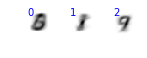

In [46]:
print("Running for 'random'")
foo_new('random',3)

Running for 'ffh'
Iteration 0, objective=0.5756726676791115
Iteration 1, objective=0.5573220106786989
Iteration 2, objective=0.5503979504044838
Iteration 3, objective=0.5468648567129071
Iteration 4, objective=0.5436803675566348
Iteration 5, objective=0.5409907518141355
Iteration 6, objective=0.5389560386284882
Iteration 7, objective=0.5373770484173642
Iteration 8, objective=0.5359808632105104
Iteration 9, objective=0.5349931439934535
Iteration 10, objective=0.5343487146613543
Iteration 11, objective=0.5339423614338955
Iteration 12, objective=0.5334985997036885
Iteration 13, objective=0.5330232328769482
Iteration 14, objective=0.5327175596578849
Iteration 15, objective=0.5326094014025541
Iteration 16, objective=0.5325575120344649
Iteration 17, objective=0.5325281125967265
Iteration 18, objective=0.5325281125967265
Iteration 0, objective=0.5546978374144236
Iteration 1, objective=0.5469397555942254
Iteration 2, objective=0.545977255973986
Iteration 3, objective=0.5450270945523273
Iteratio

Iteration 18, objective=0.5399605834233326
Iteration 19, objective=0.5399225274491415
Iteration 20, objective=0.5398622753649633
Iteration 21, objective=0.539829155056724
Iteration 22, objective=0.5398059599255015
Iteration 23, objective=0.5397851343483597
Iteration 24, objective=0.5397179923459072
Iteration 25, objective=0.5396655431958379
Iteration 26, objective=0.5396053689226068
Iteration 27, objective=0.5395779178430923
Iteration 28, objective=0.539561901686029
Iteration 29, objective=0.5395505190550822
Iteration 30, objective=0.5395505190550822
Iteration 0, objective=0.5556399675004925
Iteration 1, objective=0.5462799968101755
Iteration 2, objective=0.5444465074739886
Iteration 3, objective=0.5426434310298945
Iteration 4, objective=0.5408842091039586
Iteration 5, objective=0.539740440809751
Iteration 6, objective=0.5387474214922693
Iteration 7, objective=0.5376961649701248
Iteration 8, objective=0.5368217004633754
Iteration 9, objective=0.5359775304757514
Iteration 10, objective=

Iteration 13, objective=0.5340497461642134
Iteration 14, objective=0.5340264444084604
Iteration 15, objective=0.5339700041766925
Iteration 16, objective=0.5339143373515562
Iteration 17, objective=0.5338439664186596
Iteration 18, objective=0.5337385412578074
Iteration 19, objective=0.5336350111391905
Iteration 20, objective=0.5335973974218507
Iteration 21, objective=0.5335802691415412
Iteration 22, objective=0.5335530162338089
Iteration 23, objective=0.5335391272672597
Iteration 24, objective=0.5335391272672597
Iteration 0, objective=0.5764779263411689
Iteration 1, objective=0.5569023632650444
Iteration 2, objective=0.5465552534818372
Iteration 3, objective=0.5424811553593697
Iteration 4, objective=0.5406031446473616
Iteration 5, objective=0.5396963132383307
Iteration 6, objective=0.539313112610397
Iteration 7, objective=0.5390482192988997
Iteration 8, objective=0.5388868924103329
Iteration 9, objective=0.5387147455933691
Iteration 10, objective=0.5385831922760775
Iteration 11, objectiv

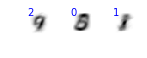

In [47]:
print("Running for 'ffh'")
foo_new('ffh',3)

Running for 'km++'
Iteration 0, objective=0.5543694808438544
Iteration 1, objective=0.5391013240246502
Iteration 2, objective=0.534711051215279
Iteration 3, objective=0.5337916775730576
Iteration 4, objective=0.533299809478506
Iteration 5, objective=0.5329642736398363
Iteration 6, objective=0.5327509591796012
Iteration 7, objective=0.5326663624571546
Iteration 8, objective=0.5326086232682091
Iteration 9, objective=0.5325720627749324
Iteration 10, objective=0.5325633973971426
Iteration 11, objective=0.532553700394671
Iteration 12, objective=0.532553700394671
Iteration 0, objective=0.5565834341644387
Iteration 1, objective=0.5476125460359661
Iteration 2, objective=0.5454996919903722
Iteration 3, objective=0.543069008771778
Iteration 4, objective=0.5413823682428962
Iteration 5, objective=0.5402145028636038
Iteration 6, objective=0.5396462258012064
Iteration 7, objective=0.5394119341709016
Iteration 8, objective=0.5392656939256468
Iteration 9, objective=0.5391268038516284
Iteration 10, obj

Iteration 13, objective=0.534159449523445
Iteration 14, objective=0.533841991787954
Iteration 15, objective=0.533701237166893
Iteration 16, objective=0.5336224552550569
Iteration 17, objective=0.5335946290722551
Iteration 18, objective=0.5335777337881602
Iteration 19, objective=0.5335721575171465
Iteration 20, objective=0.5335721575171465
Iteration 0, objective=0.5600792257937116
Iteration 1, objective=0.5468923905368234
Iteration 2, objective=0.5394788111001945
Iteration 3, objective=0.5361581258995343
Iteration 4, objective=0.5344689814864096
Iteration 5, objective=0.533681143217905
Iteration 6, objective=0.5333033584554692
Iteration 7, objective=0.532998420565511
Iteration 8, objective=0.5328046101126852
Iteration 9, objective=0.5327182324183812
Iteration 10, objective=0.5326856347840387
Iteration 11, objective=0.5326272747041139
Iteration 12, objective=0.5325868969455619
Iteration 13, objective=0.5325698061765954
Iteration 14, objective=0.5325546363065139
Iteration 15, objective=0.

Iteration 10, objective=0.5348842229666659
Iteration 11, objective=0.5344252175163
Iteration 12, objective=0.5342129600530907
Iteration 13, objective=0.5341147378524694
Iteration 14, objective=0.5340215956506502
Iteration 15, objective=0.5339155421495959
Iteration 16, objective=0.5337606638194518
Iteration 17, objective=0.5336731237460246
Iteration 18, objective=0.5336448769152794
Iteration 19, objective=0.5335744250237959
Iteration 20, objective=0.5334945368292557
Iteration 21, objective=0.5334134404325198
Iteration 22, objective=0.5332031858778583
Iteration 23, objective=0.5329672491100438
Iteration 24, objective=0.5327178687097329
Iteration 25, objective=0.5325879708677259
Iteration 26, objective=0.532552920677332
Iteration 27, objective=0.5325470295056953
Iteration 28, objective=0.5325413063175806
Iteration 29, objective=0.5325413063175806
Iteration 0, objective=0.5737654056140955
Iteration 1, objective=0.5587061792734326
Iteration 2, objective=0.5508268578944505
Iteration 3, objec

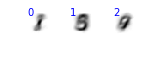

In [49]:
print("Running for 'km++'")
foo_new('km++',3)

**Comparing 'random', 'ffh' and 'km++' for large number of clusters (k=25)**

Running for 'random'
Iteration 0, objective=0.3957193068311177
Iteration 1, objective=0.3732388314706707
Iteration 2, objective=0.3675874305949783
Iteration 3, objective=0.3661092513264912
Iteration 4, objective=0.3651159978202249
Iteration 5, objective=0.3647927200296262
Iteration 6, objective=0.3646533512264018
Iteration 7, objective=0.3645040496128243
Iteration 8, objective=0.3644812104884102
Iteration 9, objective=0.3644223833360167
Iteration 10, objective=0.3644223833360167
Iteration 0, objective=0.4331395797120999
Iteration 1, objective=0.39434834050126705
Iteration 2, objective=0.3779601413062955
Iteration 3, objective=0.372073914130097
Iteration 4, objective=0.36992472217709227
Iteration 5, objective=0.36817758915490795
Iteration 6, objective=0.36734520829385053
Iteration 7, objective=0.3666832968759819
Iteration 8, objective=0.3664498689798847
Iteration 9, objective=0.3662862990784454
Iteration 10, objective=0.3661127804735037
Iteration 11, objective=0.3660520756671734
Iterati

Iteration 23, objective=0.3620563945151054
Iteration 24, objective=0.36201953765678724
Iteration 25, objective=0.3619783090374344
Iteration 26, objective=0.36194273055431564
Iteration 27, objective=0.3619164065846
Iteration 28, objective=0.3619164065846
Iteration 0, objective=0.419645760901547
Iteration 1, objective=0.38537017289093944
Iteration 2, objective=0.37650237840353923
Iteration 3, objective=0.372357541610663
Iteration 4, objective=0.3696183931283715
Iteration 5, objective=0.3676781682113266
Iteration 6, objective=0.36624449764292283
Iteration 7, objective=0.3651576967776063
Iteration 8, objective=0.36398057786980037
Iteration 9, objective=0.36312826668692905
Iteration 10, objective=0.36254132126150773
Iteration 11, objective=0.36231441935656095
Iteration 12, objective=0.3621442103473133
Iteration 13, objective=0.36206710472675896
Iteration 14, objective=0.36198790120535385
Iteration 15, objective=0.36190219226240394
Iteration 16, objective=0.36179955805842245
Iteration 17, ob

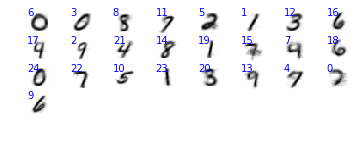

In [50]:
print("Running for 'random'")
foo_new('random',25)

Running for 'ffh'
Iteration 0, objective=0.4189682121163738
Iteration 1, objective=0.3961047284239877
Iteration 2, objective=0.38792724900003006
Iteration 3, objective=0.3835654038833412
Iteration 4, objective=0.3811594464281149
Iteration 5, objective=0.3788700038796769
Iteration 6, objective=0.3764584660650165
Iteration 7, objective=0.3746945100534401
Iteration 8, objective=0.37346433765900316
Iteration 9, objective=0.3729351369689359
Iteration 10, objective=0.372301854582034
Iteration 11, objective=0.37221287679436094
Iteration 12, objective=0.37216587179350935
Iteration 13, objective=0.37211622860735755
Iteration 14, objective=0.37205588636645437
Iteration 15, objective=0.3720396638559345
Iteration 16, objective=0.3720396638559345
Iteration 0, objective=0.41758817174552587
Iteration 1, objective=0.38930660262483097
Iteration 2, objective=0.38200769931521594
Iteration 3, objective=0.37781784485526027
Iteration 4, objective=0.3743372698496179
Iteration 5, objective=0.37164739601479047

Iteration 4, objective=0.38116698379166297
Iteration 5, objective=0.3802189447649185
Iteration 6, objective=0.37903086108096984
Iteration 7, objective=0.37797067387277694
Iteration 8, objective=0.37644551727378295
Iteration 9, objective=0.3754164094444468
Iteration 10, objective=0.37495587614255466
Iteration 11, objective=0.3746620143477997
Iteration 12, objective=0.374449396423027
Iteration 13, objective=0.3743389106186672
Iteration 14, objective=0.37422087826892986
Iteration 15, objective=0.3741594183604972
Iteration 16, objective=0.3741594183604972
Iteration 0, objective=0.4220967058114703
Iteration 1, objective=0.3920286171826536
Iteration 2, objective=0.3818647358847008
Iteration 3, objective=0.3747226323692603
Iteration 4, objective=0.36997241400179337
Iteration 5, objective=0.36721496586681956
Iteration 6, objective=0.36617753098007866
Iteration 7, objective=0.3655411009807076
Iteration 8, objective=0.36484875044312115
Iteration 9, objective=0.36389321543813713
Iteration 10, obj

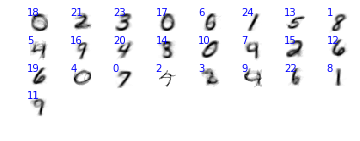

In [51]:
print("Running for 'ffh'")
foo_new('ffh',25)

Running for 'km++'
Iteration 0, objective=0.41168802795476495
Iteration 1, objective=0.3844650048210075
Iteration 2, objective=0.37053351996588835
Iteration 3, objective=0.36511430306159226
Iteration 4, objective=0.36392606414150436
Iteration 5, objective=0.36355509072076136
Iteration 6, objective=0.36318353304363143
Iteration 7, objective=0.3629693493910732
Iteration 8, objective=0.36270088295213476
Iteration 9, objective=0.36233009916011827
Iteration 10, objective=0.36197850106264695
Iteration 11, objective=0.3615866903887379
Iteration 12, objective=0.36133402653271013
Iteration 13, objective=0.3611583896410001
Iteration 14, objective=0.36098045478249075
Iteration 15, objective=0.36083964142532166
Iteration 16, objective=0.36079955136584074
Iteration 17, objective=0.3607599481733316
Iteration 18, objective=0.3606911671361224
Iteration 19, objective=0.36046594848975055
Iteration 20, objective=0.36031068231498714
Iteration 21, objective=0.36031068231498714
Iteration 0, objective=0.4219

Iteration 2, objective=0.3804591775724389
Iteration 3, objective=0.3767386895513426
Iteration 4, objective=0.373883920810298
Iteration 5, objective=0.3710176905447629
Iteration 6, objective=0.36852155219139626
Iteration 7, objective=0.3668484557783263
Iteration 8, objective=0.3650477534700562
Iteration 9, objective=0.3644839083940687
Iteration 10, objective=0.36414188852264684
Iteration 11, objective=0.36396508321539894
Iteration 12, objective=0.3639333653082241
Iteration 13, objective=0.3638731874739175
Iteration 14, objective=0.3638731874739175
Iteration 0, objective=0.39977779570723604
Iteration 1, objective=0.37949288668660486
Iteration 2, objective=0.372491049160205
Iteration 3, objective=0.37029843350914865
Iteration 4, objective=0.369311401961032
Iteration 5, objective=0.3685048324752319
Iteration 6, objective=0.3679262812129237
Iteration 7, objective=0.36757738416162494
Iteration 8, objective=0.3673288834917086
Iteration 9, objective=0.367109734878996
Iteration 10, objective=0.

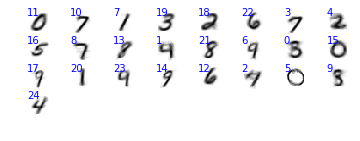

In [52]:
print("Running for 'km++'")
foo_new('km++',25)

**WU8 Answer**

***For small number of clusters (k=3) following is obtained:***
   - For Random initialization:
            Mean = 0.5336722065973729
            Average number of iterations = 25.75
            Lowest final objective = 0.5325115803013918
   - For ffh:
            Mean = 0.5343830830693473
            Average number of iterations = 21.95
            Lowest final objective = 0.532510591790001
   - For kmeans++:
            Mean = 0.5336679784031005
            Average number of iterations = 22.75
            Lowest final objective = 0.5325115803013918
            
***For Large number of clusters (k=25) following is obtained:***
   - For Random initialization:
            Mean = 0.36449740548411813
            Average number of iterations = 16.5
            Lowest final objective = 0.36112880538920045
   - For ffh:
            Mean = 0.36831978547896116
            Average number of iterations = 17.15
            Lowest final objective = 0.3607180050041421
   - For kmeans++:
            Mean = 0.3637462608943479
            Average number of iterations = 17.5
            Lowest final objective = 0.36031068231498714

When number of clusters is small then, avg. number of iterations taken to converge by ffh is smaller than kmeans++ and random initializations while the mean objective value is highest for ffh (≈ 0.534) and also it is nearly same for kmeans++ and random initializations (≈ 0.5336)

When number of clusters is large then, avg. number of iterations taken to converge by kmeans++ is greater than ffh and random initializations while the mean objective value is lowest for kmeans++